# Import all the necessary packages

In [1]:
import pandas as pd
import glob
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

# Load the data

In [2]:
import numpy as np
import os

# List all files in dir
files = os.listdir('/Users/annastonek/Desktop/Studium Unterlagen/AI_ML_Climate_Change/LamaH-CE/A_basins_total_upstrm/2_timeseries/daily')

# Select 0.5 of the files randomly 
random_files = np.random.choice(files, 100)
random_files

array(['ID_452.csv', 'ID_107.csv', 'ID_355.csv', 'ID_228.csv',
       'ID_280.csv', 'ID_162.csv', 'ID_386.csv', 'ID_488.csv',
       'ID_479.csv', 'ID_56.csv', 'ID_632.csv', 'ID_862.csv',
       'ID_541.csv', 'ID_649.csv', 'ID_437.csv', 'ID_72.csv',
       'ID_513.csv', 'ID_469.csv', 'ID_77.csv', 'ID_563.csv',
       'ID_702.csv', 'ID_90.csv', 'ID_187.csv', 'ID_135.csv',
       'ID_768.csv', 'ID_527.csv', 'ID_509.csv', 'ID_831.csv',
       'ID_336.csv', 'ID_600.csv', 'ID_673.csv', 'ID_386.csv',
       'ID_374.csv', 'ID_476.csv', 'ID_474.csv', 'ID_509.csv',
       'ID_184.csv', 'ID_713.csv', 'ID_211.csv', 'ID_689.csv',
       'ID_800.csv', 'ID_628.csv', 'ID_39.csv', 'ID_816.csv',
       'ID_489.csv', 'ID_493.csv', 'ID_344.csv', 'ID_22.csv',
       'ID_495.csv', 'ID_661.csv', 'ID_664.csv', 'ID_121.csv',
       'ID_330.csv', 'ID_260.csv', 'ID_477.csv', 'ID_261.csv',
       'ID_343.csv', 'ID_112.csv', 'ID_537.csv', 'ID_132.csv',
       'ID_291.csv', 'ID_541.csv', 'ID_279.csv', 'ID_808.csv'

In [3]:
# Get CSV files list from a folder
path = '/Users/annastonek/Desktop/Studium Unterlagen/AI_ML_Climate_Change/LamaH-CE/A_basins_total_upstrm/2_timeseries/daily/'
csv_files = []
for x in random_files:
    csv_files.append(os.path.join(path, x))

# Read each CSV file into DataFrame
# This creates a list of dataframes
counter = 0
df_list = []
for file in csv_files:
    aux = pd.read_csv(file, sep=';')
    aux['Region'] = counter
    df_list.append(aux)
    counter = counter + 1

# Pipeline

Now, we will create a regression tree from every dataset in the list and calculate the predictions.

In [5]:
mses = []
feature_importances = []
for df in df_list:
    # separate the target column from the feature columns
    y = df[['prec']]
    X = df.drop(['prec', '2m_temp_min', '2m_temp_max', '2m_dp_temp_min', '2m_dp_temp_mean', '2m_dp_temp_max'], axis=1)
    # split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # preprocessing - scale the data
    scaler = MinMaxScaler()
    X_train[['2m_temp_mean', '10m_wind_u', '10m_wind_v',
       'fcst_alb', 'lai_high_veg', 'lai_low_veg', 'swe',
       'surf_net_solar_rad_max', 'surf_net_solar_rad_mean',
       'surf_net_therm_rad_max', 'surf_net_therm_rad_mean', 'surf_press',
       'total_et', 'volsw_123', 'volsw_4']] = scaler.fit_transform(X_train[['2m_temp_mean', '10m_wind_u', '10m_wind_v',
       'fcst_alb', 'lai_high_veg', 'lai_low_veg', 'swe',
       'surf_net_solar_rad_max', 'surf_net_solar_rad_mean',
       'surf_net_therm_rad_max', 'surf_net_therm_rad_mean', 'surf_press',
       'total_et', 'volsw_123', 'volsw_4']])

    

    X_test[['2m_temp_mean', '10m_wind_u', '10m_wind_v',
       'fcst_alb', 'lai_high_veg', 'lai_low_veg', 'swe',
       'surf_net_solar_rad_max', 'surf_net_solar_rad_mean',
       'surf_net_therm_rad_max', 'surf_net_therm_rad_mean', 'surf_press',
       'total_et', 'volsw_123', 'volsw_4']] = scaler.transform(X_test[['2m_temp_mean', '10m_wind_u', '10m_wind_v',
       'fcst_alb', 'lai_high_veg', 'lai_low_veg', 'swe',
       'surf_net_solar_rad_max', 'surf_net_solar_rad_mean',
       'surf_net_therm_rad_max', 'surf_net_therm_rad_mean', 'surf_press',
       'total_et', 'volsw_123', 'volsw_4']])

    
    
    #build tree
    tree = DecisionTreeRegressor().fit(X_train, y_train)
    feature_importances.append(tree.feature_importances_)
    #calculate predictions
    y_pred = tree.predict(X_test)
    
    
    mses.append(mean_squared_error(y_test, y_pred))

# Evaluation

In [6]:
print("MSE: ", np.mean(mses))
print("RMSE: ", math.sqrt(np.mean(mses)))

MSE:  23.475945792934017
RMSE:  4.845198220190173


# Feature Importance Analysis

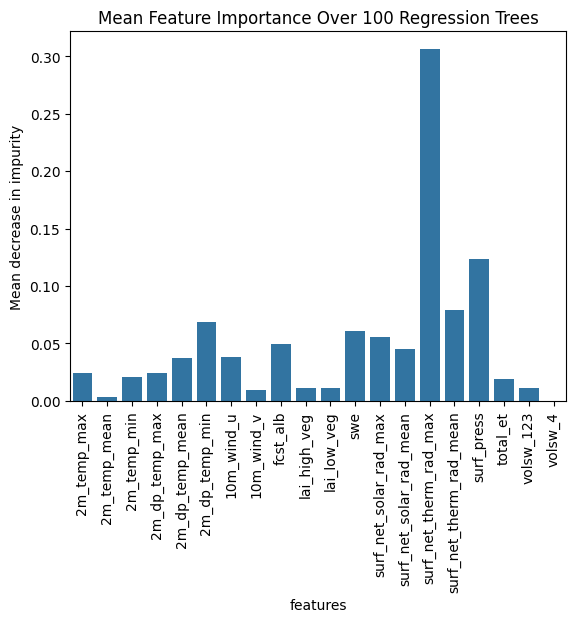

In [7]:
feature_names = [f"feature {i}" for i in range(X.shape[1])]

forest_importances = pd.DataFrame(feature_importances).T
forest_importances['features']= (['2m_temp_max', '2m_temp_mean', '2m_temp_min', '2m_dp_temp_max',
       '2m_dp_temp_mean', '2m_dp_temp_min', '10m_wind_u', '10m_wind_v',
       'fcst_alb', 'lai_high_veg', 'lai_low_veg', 'swe',
       'surf_net_solar_rad_max', 'surf_net_solar_rad_mean',
       'surf_net_therm_rad_max', 'surf_net_therm_rad_mean', 'surf_press',
       'total_et', 'volsw_123', 'volsw_4'])

forest_importances.set_index('features', inplace=True)

sns.barplot(forest_importances.mean(axis=1)).set_title("Mean Feature Importance Over 100 Regression Trees")
plt.ylabel("Mean decrease in impurity")
plt.xticks(rotation=90)
plt.show()